In [1]:
# 1. Data Loading and Initial Exploration
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder, RobustScaler
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import VarianceThreshold, SelectKBest, f_regression
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, VotingRegressor 
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
import joblib
import time
import warnings

In [2]:
# Load the dataset
df = pd.read_csv('d:/gradious/mobile games data.csv')

In [3]:
df.head()

,title_name,device_type,launch_year,game_genre,publisher_name,sales_usa,sales_europe,sales_asia,sales_misc,sales_total
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [4]:
df.tail()

,title_name,device_type,launch_year,game_genre,publisher_name,sales_usa,sales_europe,sales_asia,sales_misc,sales_total
16593,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.0,0.0,0.01
16594,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.0,0.0,0.01
16595,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.0,0.0,0.01
16596,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.0,0.0,0.01
16597,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.0,0.0,0.01


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title_name      16598 non-null  object 
 1   device_type     16598 non-null  object 
 2   launch_year     16327 non-null  float64
 3   game_genre      16598 non-null  object 
 4   publisher_name  16540 non-null  object 
 5   sales_usa       16598 non-null  float64
 6   sales_europe    16598 non-null  float64
 7   sales_asia      16598 non-null  float64
 8   sales_misc      16598 non-null  float64
 9   sales_total     16598 non-null  float64
dtypes: float64(6), object(4)
memory usage: 1.3+ MB


In [6]:
df.describe(include='object')

,title_name,device_type,game_genre,publisher_name
count,16598,16598,16598,16540
unique,11493,31,12,578
top,Need for Speed: Most Wanted,DS,Action,Electronic Arts
freq,12,2163,3316,1351


In [7]:
df.describe()

,launch_year,sales_usa,sales_europe,sales_asia,sales_misc,sales_total
count,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


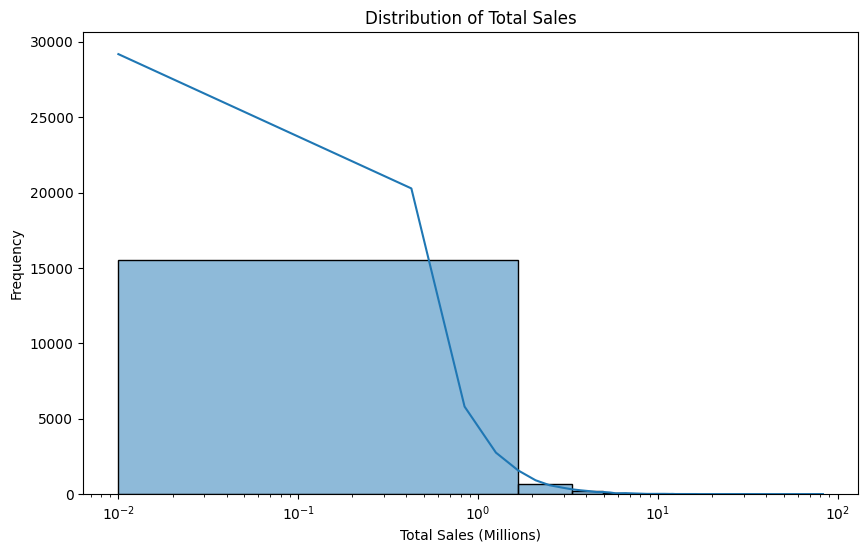

Sales Total Skewness: 17.40


In [8]:
#EDA
#visualize sales total distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['sales_total'], bins=50, kde=True)
plt.xscale('log')
plt.title('Distribution of Total Sales')
plt.xlabel('Total Sales (Millions)')
plt.ylabel('Frequency')
plt.show()
print(f"Sales Total Skewness: {df['sales_total'].skew():.2f}")

        launch_year     sales_usa  sales_europe    sales_asia    sales_misc  \
count  16327.000000  16598.000000  16598.000000  16598.000000  16598.000000   
mean    2006.406443      0.264667      0.146652      0.077782      0.048063   
std        5.828981      0.816683      0.505351      0.309291      0.188588   
min     1980.000000      0.000000      0.000000      0.000000      0.000000   
25%     2003.000000      0.000000      0.000000      0.000000      0.000000   
50%     2007.000000      0.080000      0.020000      0.000000      0.010000   
75%     2010.000000      0.240000      0.110000      0.040000      0.040000   
max     2020.000000     41.490000     29.020000     10.220000     10.570000   

        sales_total  
count  16598.000000  
mean       0.537441  
std        1.555028  
min        0.010000  
25%        0.060000  
50%        0.170000  
75%        0.470000  
max       82.740000  


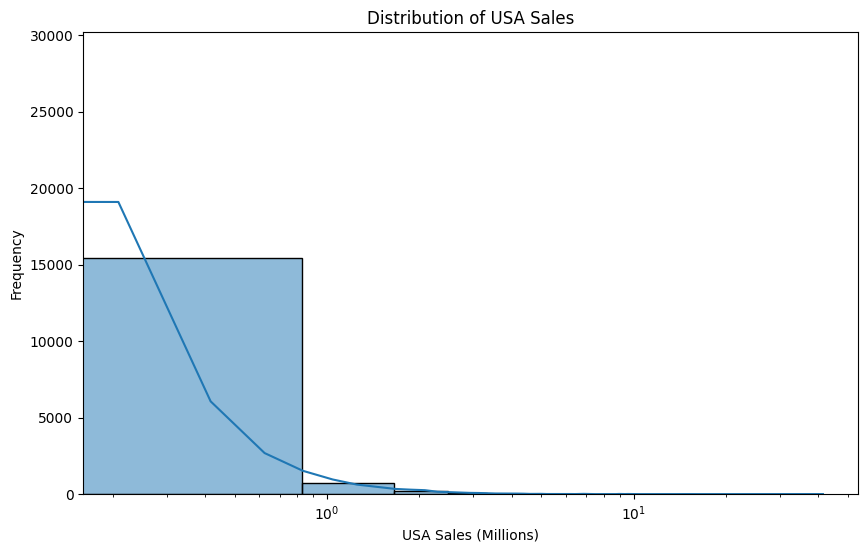

In [9]:
#Numerical Features Visualization
numerical_features = ['launch_year', 'sales_usa', 'sales_europe', 'sales_asia', 'sales_misc', 'sales_total']
print(df[numerical_features].describe())
plt.figure(figsize=(10, 6))
sns.histplot(df['sales_usa'], bins=50, kde=True)
plt.xscale('log')
plt.title('Distribution of USA Sales')
plt.xlabel('USA Sales (Millions)')
plt.ylabel('Frequency')
plt.show()

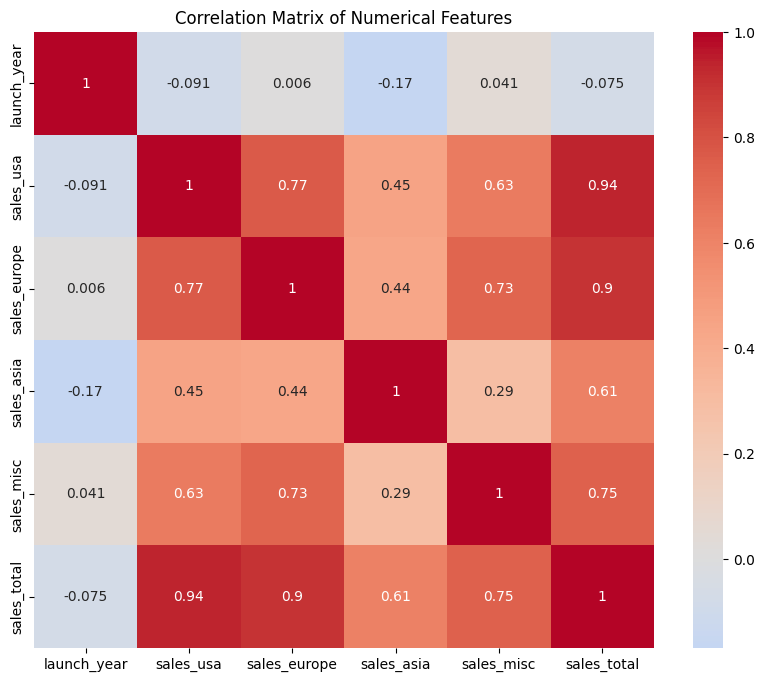

In [10]:
#Correlation Analysis For  Numerical Features
plt.figure(figsize=(10, 8))
sns.heatmap(df[numerical_features].corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

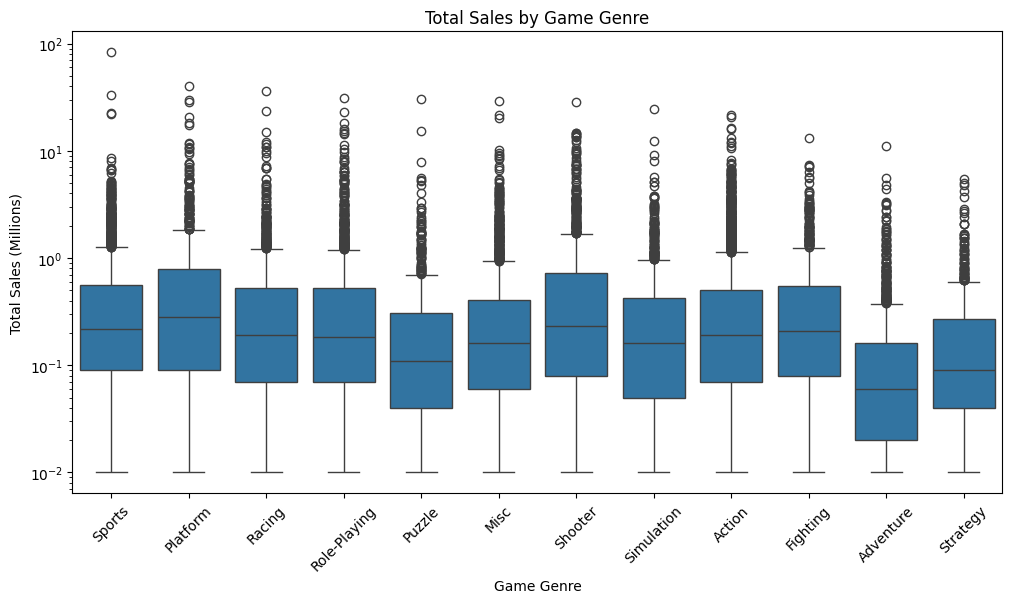

In [11]:
#Dependency of sales_total on game_genre and device_type
plt.figure(figsize=(12, 6))
sns.boxplot(x='game_genre', y='sales_total', data=df)
plt.yscale('log')
plt.xticks(rotation=45)
plt.title('Total Sales by Game Genre')
plt.xlabel('Game Genre')
plt.ylabel('Total Sales (Millions)')
plt.show()

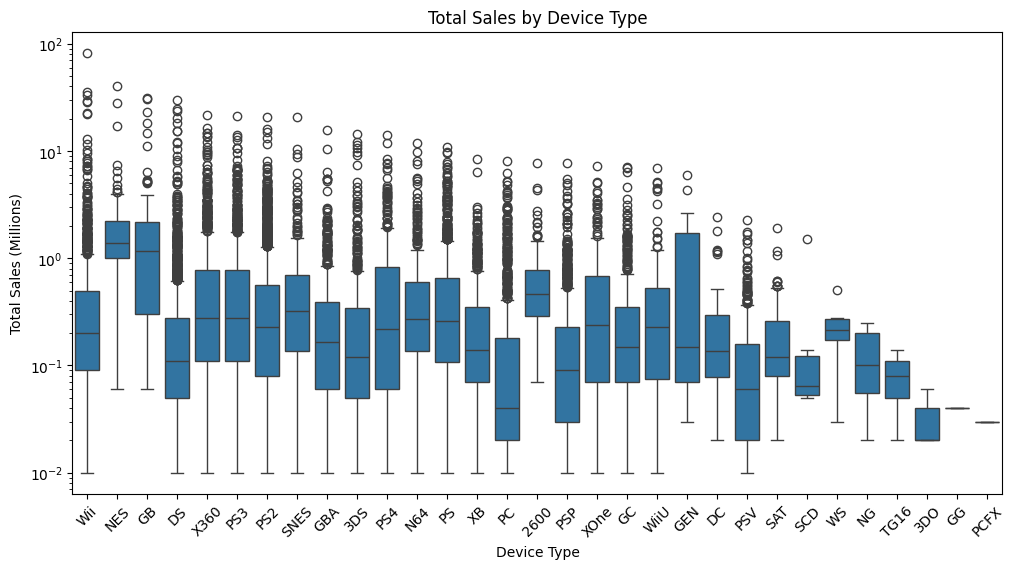

In [12]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='device_type', y='sales_total', data=df)
plt.yscale('log')
plt.xticks(rotation=45)
plt.title('Total Sales by Device Type')
plt.xlabel('Device Type')
plt.ylabel('Total Sales (Millions)')
plt.show()

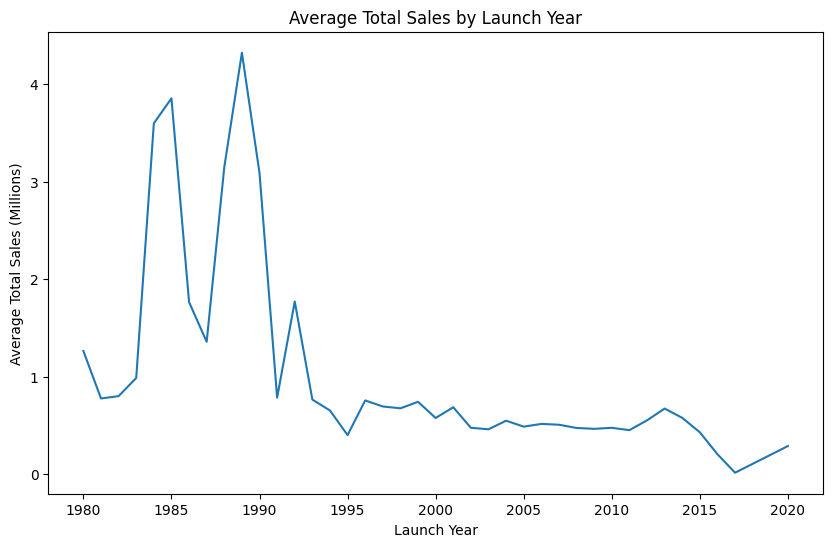

In [13]:
#Market Trends by sales_total and launch_year
plt.figure(figsize=(10, 6))
sns.lineplot(x='launch_year', y='sales_total', 
             data=df.groupby('launch_year')['sales_total'].mean().reset_index())
plt.title('Average Total Sales by Launch Year')
plt.xlabel('Launch Year')
plt.ylabel('Average Total Sales (Millions)')
plt.show()

In [14]:
#Filling Missing Values and Outlier Removal
median_launch_year=df['launch_year'].median()
df.fillna(median_launch_year, inplace=True)

df.drop(columns=['publisher_name'], inplace=True)

#  Added outlier removal for better performance
print("Dataset shape before outlier removal:", df.shape)
sales_lower = df['sales_total'].quantile(0.01)
sales_upper = df['sales_total'].quantile(0.99)
df = df[(df['sales_total'] >= sales_lower) & (df['sales_total'] <= sales_upper)]
print("Dataset shape after outlier removal:", df.shape)

df.isnull().sum()

df.head()

# 3. Feature Engineering & EDA
# Enhanced safe division function
def safe_divide(a, b, default=0):
    """Enhanced safe division with better handling"""
    return np.where(b != 0, a / b, default)

# Create target variable
df['log_sales_total'] = np.log1p(df['sales_total'])

# Enhanced ratio features using improved function
df['usa_ratio'] = safe_divide(df['sales_usa'], df['sales_total'])
df['europe_ratio'] = safe_divide(df['sales_europe'], df['sales_total'])
df['asia_ratio'] = safe_divide(df['sales_asia'], df['sales_total'])
df['misc_ratio'] = safe_divide(df['sales_misc'], df['sales_total'])

# Enhanced temporal features
df['years_since_1980'] = df['launch_year'] - 1980
df['is_recent'] = (df['launch_year'] >= 2010).astype(int)
df['decade'] = (df['launch_year'] // 10) * 10

# Enhanced regional features
df['usa_europe_combined'] = df['sales_usa'] + df['sales_europe']
df['dominant_region_score'] = df[['usa_ratio', 'europe_ratio', 'asia_ratio', 'misc_ratio']].max(axis=1)

# Market diversity feature (entropy-like measure)
ratios = df[['usa_ratio', 'europe_ratio', 'asia_ratio', 'misc_ratio']] + 1e-10
df['market_diversity'] = -(ratios * np.log(ratios)).sum(axis=1)

# Enhanced category grouping with different thresholds
def group_rare_categories(series, min_count=50):
    """Enhanced category grouping"""
    value_counts = series.value_counts()
    rare_categories = value_counts[value_counts < min_count].index
    return series.replace(rare_categories, 'Other')

df['device_type_grouped'] = group_rare_categories(df['device_type'], 30)
df['game_genre_grouped'] = group_rare_categories(df['game_genre'], 20)

print("Enhanced features created successfully!")


Dataset shape before outlier removal: (16598, 9)
Dataset shape after outlier removal: (16432, 9)
Enhanced features created successfully!


In [15]:
# 5. Data Preparation
#Enhanced feature set with new engineered features
features_to_keep = [
    'device_type_grouped', 'game_genre_grouped',
    'usa_ratio', 'europe_ratio', 'asia_ratio', 'misc_ratio',
    'years_since_1980', 'is_recent', 'decade',
    'dominant_region_score', 'market_diversity', 'usa_europe_combined'
]

# Create final dataset
X = df[features_to_keep]
y = df['log_sales_total']

print(f"Feature matrix shape: {X.shape}")

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=pd.qcut(y, q=10, duplicates='drop')  # CHANGED: Added duplicates='drop'
)


Feature matrix shape: (16432, 12)


In [16]:
# 6. Preprocessing Pipeline
# Updated feature lists to match new features
categorical_features = ['device_type_grouped', 'game_genre_grouped']
numerical_features = [col for col in features_to_keep if col not in categorical_features]

# Create transformers
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', RobustScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

# Combine transformers
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [17]:
# 7. Model Training with Enhanced Setup
# Enhanced models with optimized parameters and added ExtraTreesRegressor
models = {
    'XGBoost': XGBRegressor(
        n_estimators=300,
        max_depth=6,
        learning_rate=0.1,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42,
        tree_method='hist'
    ),
    'LightGBM': LGBMRegressor(
        n_estimators=300,
        max_depth=6,
        learning_rate=0.1,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42,
        verbose=-1
    ),
    'RandomForest': RandomForestRegressor(
        n_estimators=200,
        max_depth=15,
        min_samples_split=5,
        min_samples_leaf=2,
        random_state=42,
        n_jobs=-1
    ),
    'GradientBoosting': GradientBoostingRegressor(
        n_estimators=200,
        learning_rate=0.1,
        max_depth=6,
        subsample=0.8,
        random_state=42
    )
}

# Simplified parameter grids for better performance
param_grids = {
    'XGBoost': {
        'model__n_estimators': [200, 300, 400],
        'model__max_depth': [5, 6, 7],
        'model__learning_rate': [0.05, 0.1, 0.15]
    },
    'LightGBM': {
        'model__n_estimators': [200, 300, 400],
        'model__max_depth': [5, 6, 7],
        'model__learning_rate': [0.05, 0.1, 0.15]
    },
    'RandomForest': {
        'model__n_estimators': [150, 200, 250],
        'model__max_depth': [10, 15, 20],
        'model__min_samples_split': [2, 5, 10]
    },
    'GradientBoosting': {
        'model__n_estimators': [150, 200, 250],
        'model__learning_rate': [0.05, 0.1, 0.15],
        'model__max_depth': [4, 6, 8]
    }
}

In [18]:
# 8. Model Training and Evaluation
# Enhanced training with cross-validation and better metrics tracking
results = {}
training_times = {}
best_model = None
best_score = float('inf')

print("\n" + "="*50)
print("TRAINING MODELS (Enhanced Parameters)")
print("="*50)

for name, model in models.items():
    print(f"\n{'-'*40}")
    print(f"Training {name}")
    print(f"{'-'*40}")
    
    start_time = time.time()
    
    # Create pipeline
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', model)
    ])
    
    # Reduced iterations for faster training while maintaining quality
    random_search = RandomizedSearchCV(
        pipeline, 
        param_distributions=param_grids[name],
        n_iter=10,  
        cv=3,
        scoring='neg_mean_squared_error',
        n_jobs=-1,
        random_state=42,
        verbose=0  # Reduced verbosity
    )
    
    # Train model
    random_search.fit(X_train, y_train)
    
    # Get best model
    best_estimator = random_search.best_estimator_
    training_time = time.time() - start_time
    training_times[name] = training_time
    
    
    # Enhanced evaluation with cross-validation
    y_pred_train = best_estimator.predict(X_train)
    y_pred_test = best_estimator.predict(X_test)
    
    train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
    test_mae = mean_absolute_error(y_test, y_pred_test)
    test_r2 = r2_score(y_test, y_pred_test)
    
    # Cross-validation
    cv_scores = cross_val_score(best_estimator, X_train, y_train, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
    cv_rmse = np.sqrt(-cv_scores.mean())
    cv_std = np.sqrt(cv_scores.std())
    
    # Store results
    results[name] = {
        'model': best_estimator,
        'train_rmse': train_rmse,
        'test_rmse': test_rmse,
        'test_mae': test_mae,
        'test_r2': test_r2,
        'cv_rmse': cv_rmse,
        'cv_std': cv_std,
        'training_time': training_time,
        'best_params': random_search.best_params_
    }
    
    # Results display
    print(f"\n{name} Results:")
    print(f"  Train RMSE: {train_rmse:.4f}")
    print(f"  Test RMSE:  {test_rmse:.4f}")
    print(f"  Test MAE:   {test_mae:.4f}")
    print(f"  Test R²:    {test_r2:.4f}")
    print(f"  CV RMSE:    {cv_rmse:.4f} (±{cv_std:.4f})")
    print(f"  Training time: {training_time:.2f} seconds")
    print(f"  Best params: {random_search.best_params_}")
    
    # Update best model
    if test_rmse < best_score:
        best_score = test_rmse
        best_model = name



TRAINING MODELS (Enhanced Parameters)

----------------------------------------
Training XGBoost
----------------------------------------

XGBoost Results:
  Train RMSE: 0.0543
  Test RMSE:  0.0558
  Test MAE:   0.0248
  Test R²:    0.9714
  CV RMSE:    0.0664 (±0.0267)
  Training time: 15.48 seconds
  Best params: {'model__n_estimators': 200, 'model__max_depth': 5, 'model__learning_rate': 0.1}

----------------------------------------
Training LightGBM
----------------------------------------


c:\Users\defaultuser0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\defaultuser0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(



LightGBM Results:
  Train RMSE: 0.0553
  Test RMSE:  0.0539
  Test MAE:   0.0208
  Test R²:    0.9734
  CV RMSE:    0.0634 (±0.0263)
  Training time: 14.76 seconds
  Best params: {'model__n_estimators': 400, 'model__max_depth': 5, 'model__learning_rate': 0.1}

----------------------------------------
Training RandomForest
----------------------------------------

RandomForest Results:
  Train RMSE: 0.0599
  Test RMSE:  0.0599
  Test MAE:   0.0230
  Test R²:    0.9671
  CV RMSE:    0.0671 (±0.0275)
  Training time: 72.99 seconds
  Best params: {'model__n_estimators': 150, 'model__min_samples_split': 2, 'model__max_depth': 10}

----------------------------------------
Training GradientBoosting
----------------------------------------

GradientBoosting Results:
  Train RMSE: 0.0557
  Test RMSE:  0.0555
  Test MAE:   0.0228
  Test R²:    0.9717
  CV RMSE:    0.0648 (±0.0282)
  Training time: 65.03 seconds
  Best params: {'model__n_estimators': 150, 'model__max_depth': 4, 'model__learning_


MODEL COMPARISON
              Model  Test RMSE  Test MAE  Test R²  CV RMSE  CV Std  \
1          LightGBM     0.0539    0.0208   0.9734   0.0634  0.0263   
3  GradientBoosting     0.0555    0.0228   0.9717   0.0648  0.0282   
0           XGBoost     0.0558    0.0248   0.9714   0.0664  0.0267   
2      RandomForest     0.0599    0.0230   0.9671   0.0671  0.0275   

   Training Time (s)  
1            14.7565  
3            65.0342  
0            15.4848  
2            72.9885  

 Best Individual Model: LightGBM
 Best Individual RMSE: 0.0539


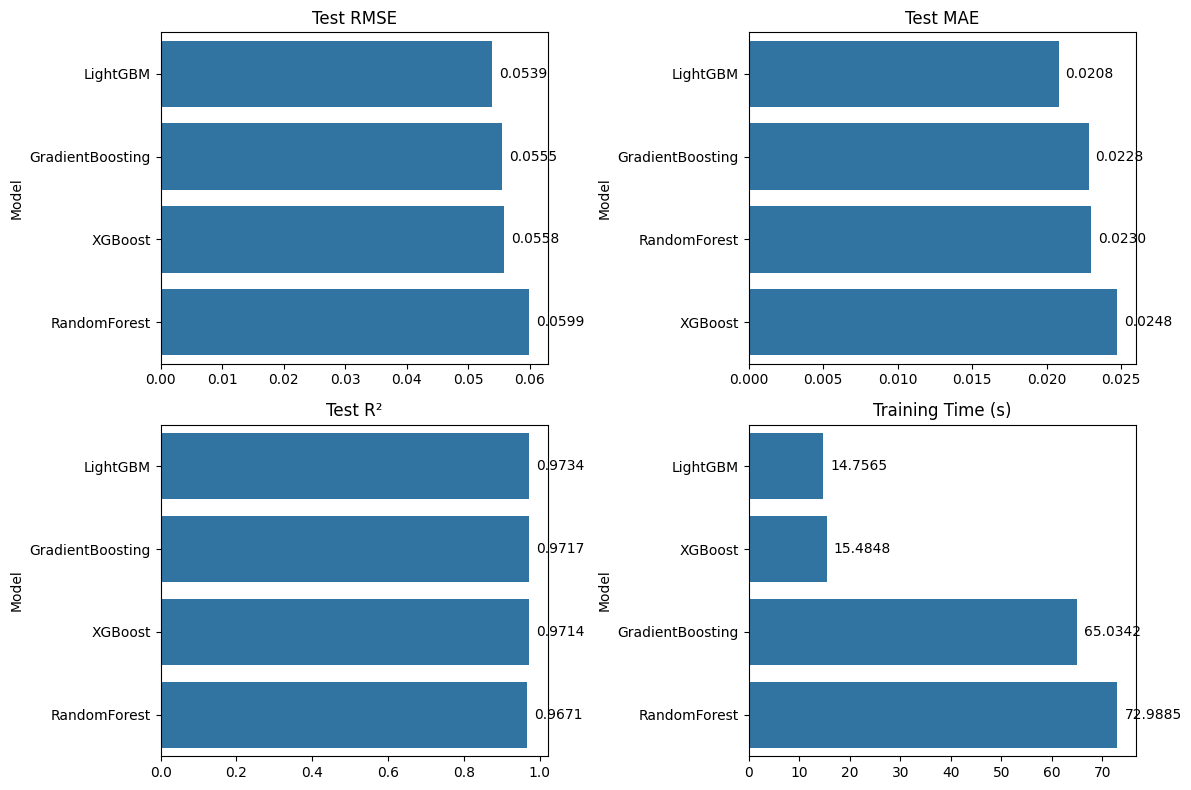

In [19]:
# 9. Results Comparison
# Enhanced comparison with more metrics
print("\n" + "="*50)
print("MODEL COMPARISON")
print("="*50)

comparison = pd.DataFrame({
    'Model': list(results.keys()),
    'Test RMSE': [results[name]['test_rmse'] for name in results],
    'Test MAE': [results[name]['test_mae'] for name in results],
    'Test R²': [results[name]['test_r2'] for name in results],
    'CV RMSE': [results[name]['cv_rmse'] for name in results],
    'CV Std': [results[name]['cv_std'] for name in results],
    'Training Time (s)': [results[name]['training_time'] for name in results]
}).sort_values(by='Test RMSE')

print(comparison.round(4))

# Find best individual model
best_individual_model = min(results.keys(), key=lambda x: results[x]['test_rmse'])
best_individual_rmse = results[best_individual_model]['test_rmse']

print(f"\n Best Individual Model: {best_individual_model}")
print(f" Best Individual RMSE: {best_individual_rmse:.4f}")

# Visual comparison
plt.figure(figsize=(12, 8))
metrics = ['Test RMSE', 'Test MAE', 'Test R²', 'Training Time (s)']
positions = range(len(metrics))

for i, metric in enumerate(metrics):
    plt.subplot(2, 2, i+1)
    sorted_df = comparison.sort_values(by=metric, ascending=(metric != 'Test R²'))
    ax = sns.barplot(x=metric, y='Model', data=sorted_df)
    plt.title(metric)
    plt.xlabel('')
    
    # Add values to bars
    for p in ax.patches:
        width = p.get_width()
        plt.annotate(f'{width:.4f}', (width, p.get_y() + p.get_height()/2),
                     ha='left', va='center', xytext=(5, 0), textcoords='offset points')

plt.tight_layout()
plt.show()


FEATURE IMPORTANCE ANALYSIS


C:\Users\defaultuser0\AppData\Local\Temp\ipykernel_30104\958039175.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
C:\Users\defaultuser0\AppData\Local\Temp\ipykernel_30104\958039175.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
C:\Users\defaultuser0\AppData\Local\Temp\ipykernel_30104\958039175.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df, pa

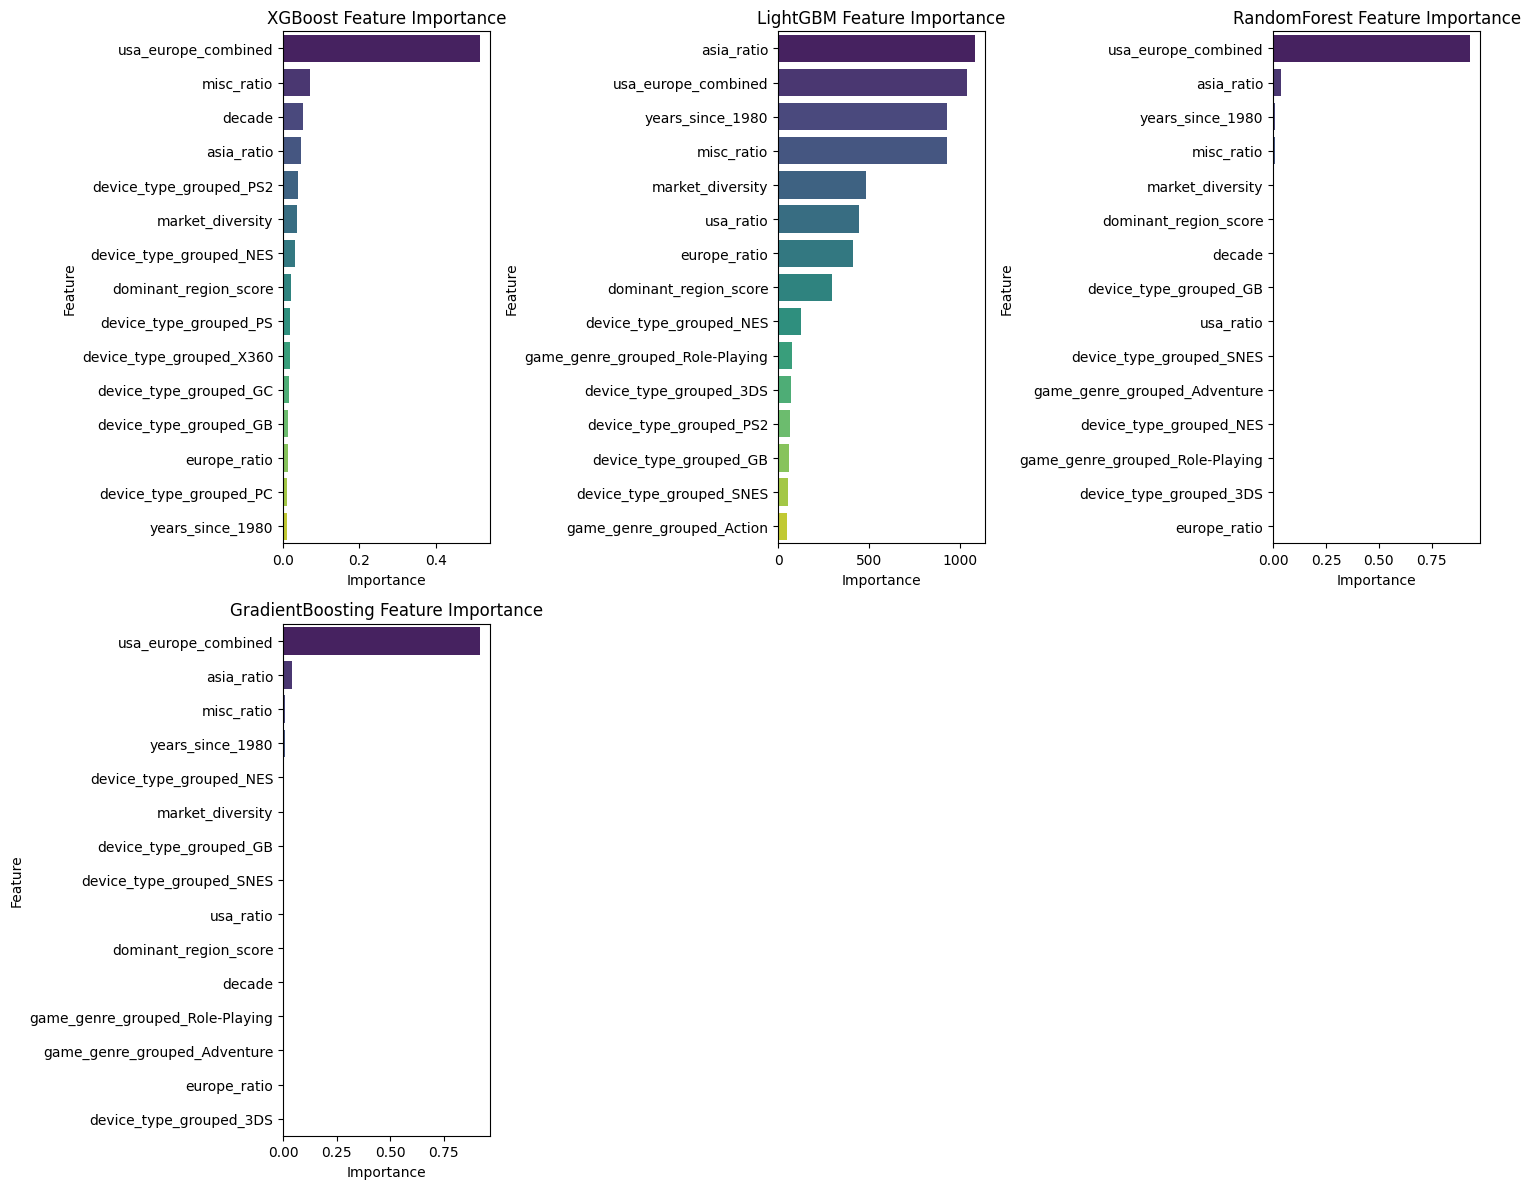


CREATING ENSEMBLE MODEL
Creating ensemble from top 3 models: ['LightGBM', 'GradientBoosting', 'XGBoost']
Ensemble Model Results:
  Test RMSE: 0.0538
  Test MAE:  0.0211
  Test R²:   0.9734

FINAL SUMMARY
Best Individual Model: LightGBM
Best Individual RMSE: 0.0539
Ensemble RMSE: 0.0538
Ensemble model performs better!


c:\Users\defaultuser0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


In [20]:
# 10. Feature Importance Analysis
#  Enhanced feature importance with better visualization
print(f"\n" + "="*50)
print(f"FEATURE IMPORTANCE ANALYSIS")
print("="*50)

plt.figure(figsize=(15, 12))
for i, (name, result) in enumerate(results.items(), 1):
    model = result['model']
    
    # Check if model supports feature importances
    if hasattr(model.named_steps['model'], 'feature_importances_'):
        # Get feature names
        preprocessor = model.named_steps['preprocessor']
        num_features = numerical_features
        try:
            cat_features = preprocessor.named_transformers_['cat'].named_steps['onehot'].get_feature_names_out(categorical_features)
            all_features = np.concatenate([num_features, cat_features])
        except:
            all_features = num_features
        
        # Get importances
        importances = model.named_steps['model'].feature_importances_
        
        # Create importance dataframe
        importance_df = pd.DataFrame({
            'Feature': all_features[:len(importances)],  # Safety check
            'Importance': importances
        }).sort_values('Importance', ascending=False).head(15)  # Top 15 features
        
        # Plot
        plt.subplot(2, 3, i)
        sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
        plt.title(f'{name} Feature Importance')
        plt.tight_layout()

plt.show()

#  Added ensemble model creation
print(f"\n" + "="*50)
print("CREATING ENSEMBLE MODEL")
print("="*50)

# Select top 3 models for ensemble
sorted_models = sorted(results.items(), key=lambda x: x[1]['test_rmse'])
top_3_models = [(name, data['model']) for name, data in sorted_models[:3]]

print(f"Creating ensemble from top 3 models: {[name for name, _ in top_3_models]}")

ensemble = VotingRegressor(top_3_models)
ensemble.fit(X_train, y_train)

# Ensemble predictions
y_pred_ensemble = ensemble.predict(X_test)
ensemble_rmse = np.sqrt(mean_squared_error(y_test, y_pred_ensemble))
ensemble_mae = mean_absolute_error(y_test, y_pred_ensemble)
ensemble_r2 = r2_score(y_test, y_pred_ensemble)

print(f"Ensemble Model Results:")
print(f"  Test RMSE: {ensemble_rmse:.4f}")
print(f"  Test MAE:  {ensemble_mae:.4f}")
print(f"  Test R²:   {ensemble_r2:.4f}")

# Enhanced final model selection
print(f"\n" + "="*50)
print("FINAL SUMMARY")
print("="*50)
print(f"Best Individual Model: {best_individual_model}")
print(f"Best Individual RMSE: {best_individual_rmse:.4f}")
print(f"Ensemble RMSE: {ensemble_rmse:.4f}")

if ensemble_rmse < best_individual_rmse:
    print("Ensemble model performs better!")
    final_model = ensemble
    final_rmse = ensemble_rmse
    final_name = "Ensemble"
else:
    print(f"{best_individual_model} is the best performing model!")
    final_model = results[best_individual_model]['model']
    final_rmse = best_individual_rmse
    final_name = best_individual_model

In [21]:
# 11. Final Model Deployment
print(f"FINAL MODEL: {final_name}")
print(f"Final RMSE: {final_rmse:.4f}")

#  Added sample predictions showcase
print("SAMPLE PREDICTIONS")

sample_size = min(10, len(X_test))
sample_predictions = final_model.predict(X_test.iloc[:sample_size])
actual_values = y_test.iloc[:sample_size]

# Instead of formatted output, print raw numbers
for i in range(len(sample_predictions)):
    print(f"Sample {i+1:2d}: Predicted: {sample_predictions[i]:.6f} | Actual: {actual_values.iloc[i]:.6f} | Error: {abs(sample_predictions[i] - actual_values.iloc[i])/actual_values.iloc[i]*100:.1f}%")

print("Predictions stats:")
print(f"Min: {sample_predictions.min():.6f}")
print(f"Max: {sample_predictions.max():.6f}")
print(f"Mean: {sample_predictions.mean():.6f}")
print(f"Std: {sample_predictions.std():.6f}")

print("\nActual values stats:")
print(f"Min: {actual_values.min():.6f}")
print(f"Max: {actual_values.max():.6f}")
print(f"Mean: {actual_values.mean():.6f}")
print(f"Std: {actual_values.std():.6f}")

print("Raw predictions (first 10):")
print(sample_predictions[:10])
print("\nRaw actual values (first 10):")
print(actual_values[:10].to_numpy())

FINAL MODEL: Ensemble
Final RMSE: 0.0538
SAMPLE PREDICTIONS
Sample  1: Predicted: 0.116024 | Actual: 0.122218 | Error: 5.1%
Sample  2: Predicted: 0.914119 | Actual: 0.924259 | Error: 1.1%
Sample  3: Predicted: 0.133093 | Actual: 0.122218 | Error: 8.9%
Sample  4: Predicted: 0.858542 | Actual: 0.854415 | Error: 0.5%
Sample  5: Predicted: 0.160110 | Actual: 0.157004 | Error: 2.0%
Sample  6: Predicted: 0.037774 | Actual: 0.019803 | Error: 90.8%
Sample  7: Predicted: 0.799278 | Actual: 0.756122 | Error: 5.7%
Sample  8: Predicted: 0.505743 | Actual: 0.500775 | Error: 1.0%
Sample  9: Predicted: 0.162748 | Actual: 0.157004 | Error: 3.7%
Sample 10: Predicted: 0.286073 | Actual: 0.285179 | Error: 0.3%
Predictions stats:
Min: 0.037774
Max: 0.914119
Mean: 0.397350
Std: 0.324810

Actual values stats:
Min: 0.019803
Max: 0.924259
Mean: 0.389900
Std: 0.341151
Raw predictions (first 10):
[0.11602443 0.91411892 0.13309274 0.85854208 0.16011024 0.03777389
 0.79927826 0.50574322 0.16274758 0.28607276]

Ra

c:\Users\defaultuser0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
